# LTAT.02.006 Andmeteaduse meetodid

## 6. praktikum "Aegread".


Praktikumi eesmärk on uurida kahte sünteetilist aegrida. Uurida tuleks nende autokorrelatsiooni ning leida ligikaudu koht või kohad nendes aegridades, kus pikaajaline keskmine muutub.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
d1 = pd.read_csv('aegrida1.csv',names=[0])[0]
d1

0        5.0
1        5.0
2        5.0
3        7.0
4        7.0
        ... 
99995   -5.0
99996   -7.0
99997   -5.0
99998   -5.0
99999   -3.0
Name: 0, Length: 100000, dtype: float64

In [3]:
d2 = pd.read_csv('aegrida2.csv',names=[0])[0]
d2

0       -7.058831
1       -6.284602
2       -6.493105
3       -6.625184
4       -5.233348
           ...   
99995    0.006800
99996   -1.541692
99997   -1.464854
99998   -0.285660
99999    0.584588
Name: 0, Length: 100000, dtype: float64

Siin on mõned kasulikud funktsioonid:


In [4]:
# algne aegrida
print(list(d1[:10]))

# d1.shift(2) nihutab andmeid 2 võrra paremale
print(list(d1.shift(2)[:10]))

# d1.rolling(2).mean() liigub aknaga mille suurus on 2 ja võtab akna sees keskmise
print(list(d1.rolling(2).mean()[:10]))

[5.0, 5.0, 5.0, 7.0, 7.0, 5.0, 7.0, 7.0, 5.0, 7.0]
[nan, nan, 5.0, 5.0, 5.0, 7.0, 7.0, 5.0, 7.0, 7.0]
[nan, 5.0, 5.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0]


In [5]:
print(d1.autocorr(0)) # autokorrelatsioon ilma ajalise nihketa on 1
print(d1.autocorr(1)) # autokorrelatsioon nihkega 1

1.0
0.9444517529451968


# 1. ülesanne

Teha mõlemist aegreast eraldi joonis. Näiteks esimesest 300-st andmepunktist.


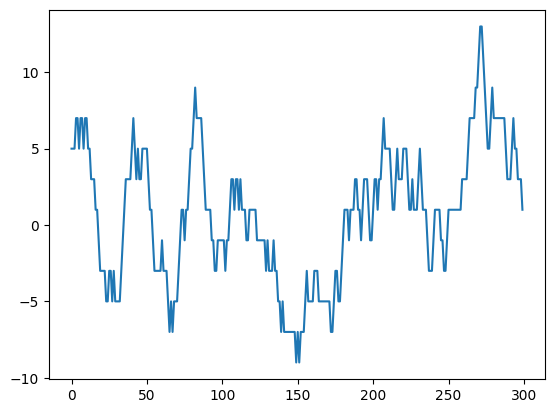

In [8]:
plt.plot(d1[:300],label='aegrida1')


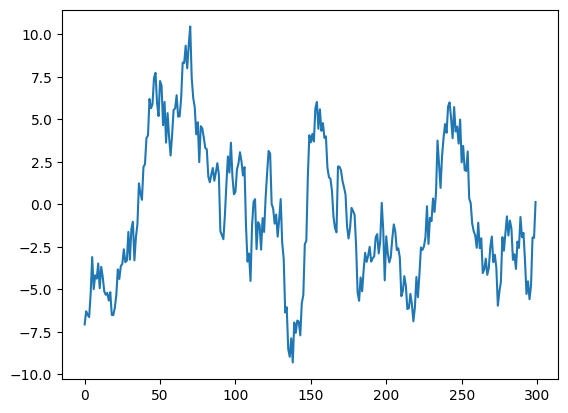

In [9]:
plt.plot(d2[:300],label='aegrida2')

# 2. ülesanne

Siin ja järgmisteski ülesannetes tuleks sama teha mõlema aegrea korral. Teha aegreast koopia nihkega 1. Seejärel vaadelda aegrida kui ühte tunnust ja tema nihet kui teist tunnust ning teha nende tunnuste ühisjaotusest joonis, näiteks funktsiooniga `plt.scatter`. Korrelatsiooni aegrea ja tema nihke vahel nimetatakse **autokorrelatsiooniks**. Leidke kovariatsioonimaatriks funktsiooniga `np.cov(...)` ning arvutage autokorrelatsioon meetodiga `d1.autocorr(1)` ja `d2.autocorr(1)`. Proovida ka suuremaid nihkeid.


In [11]:
d1_nihgega = d1.copy().shift(1)
d2_nihgega = d2.copy().shift(1)

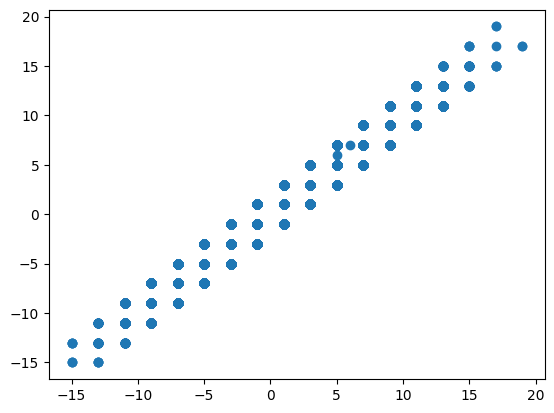

In [12]:
plt.scatter(d1,d1_nihgega)

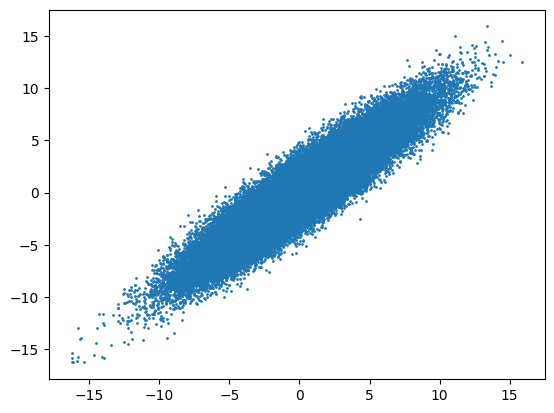

In [16]:
plt.scatter(d2,d2_nihgega, s=1)

In [ ]:
d1.autocorr(30)


np.float64(0.049202404693517776)

In [21]:
d2.autocorr(30)

np.float64(0.030862919815496704)

# 3. ülesanne

Teha joonis hõrendatud aegreast, näiteks võttes ainult iga 5-nda elemendi. Näiteks joonistada üles esimesed 300 punkti hõrendatud aegreas. Proovida erinevaid hõrendusi (iga 3. element, iga 10., iga 20., iga 50. element). Milliseid erinevusi märkate nende jooniste vahel sõltuvalt hõrenduse astmest?


In [22]:
def aegrea_hõrendamise_joonis(pealkiri, aegrida):
    fig, axs = plt.subplots(2, 2, figsize=(15,10))

    for parameetrid in [
        {"k": 3,  "pos": (0,0)},
        {"k": 10, "pos": (0,1)},
        {"k": 20, "pos": (1,0)},
        {"k": 50, "pos": (1,1)}]:

        k = parameetrid["k"]
        rida, veerg = parameetrid["pos"]
        ax = axs[rida][veerg]

        x_vektor = range(0, k*300, k)
        hõrendatud_aegrida = aegrida[x_vektor]

        ax.plot(x_vektor, hõrendatud_aegrida)
        ax.set_title(f"Iga {k}-s element")

    fig.suptitle(pealkiri, fontsize=20)
    plt.show()

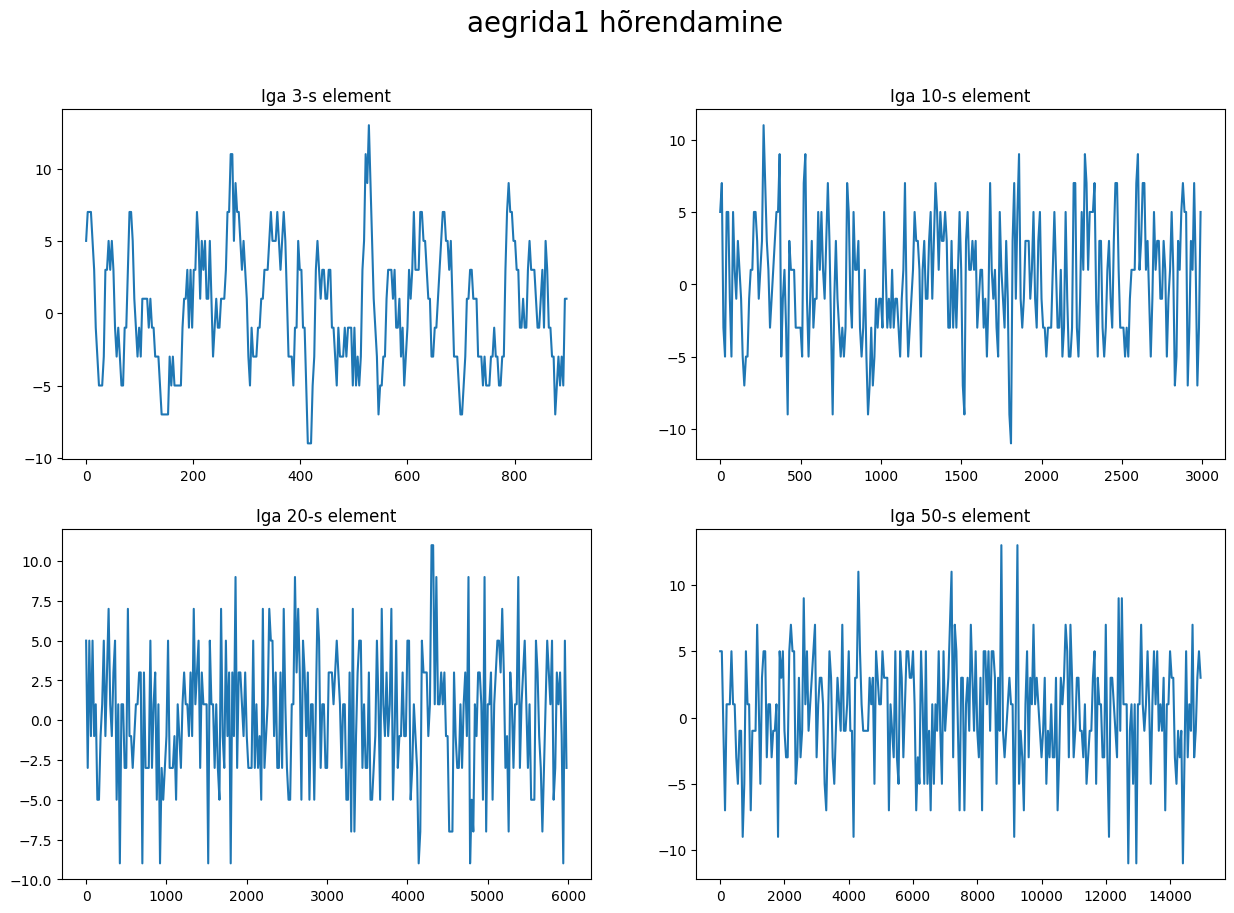

In [23]:
aegrea_hõrendamise_joonis("aegrida1 hõrendamine", d1)

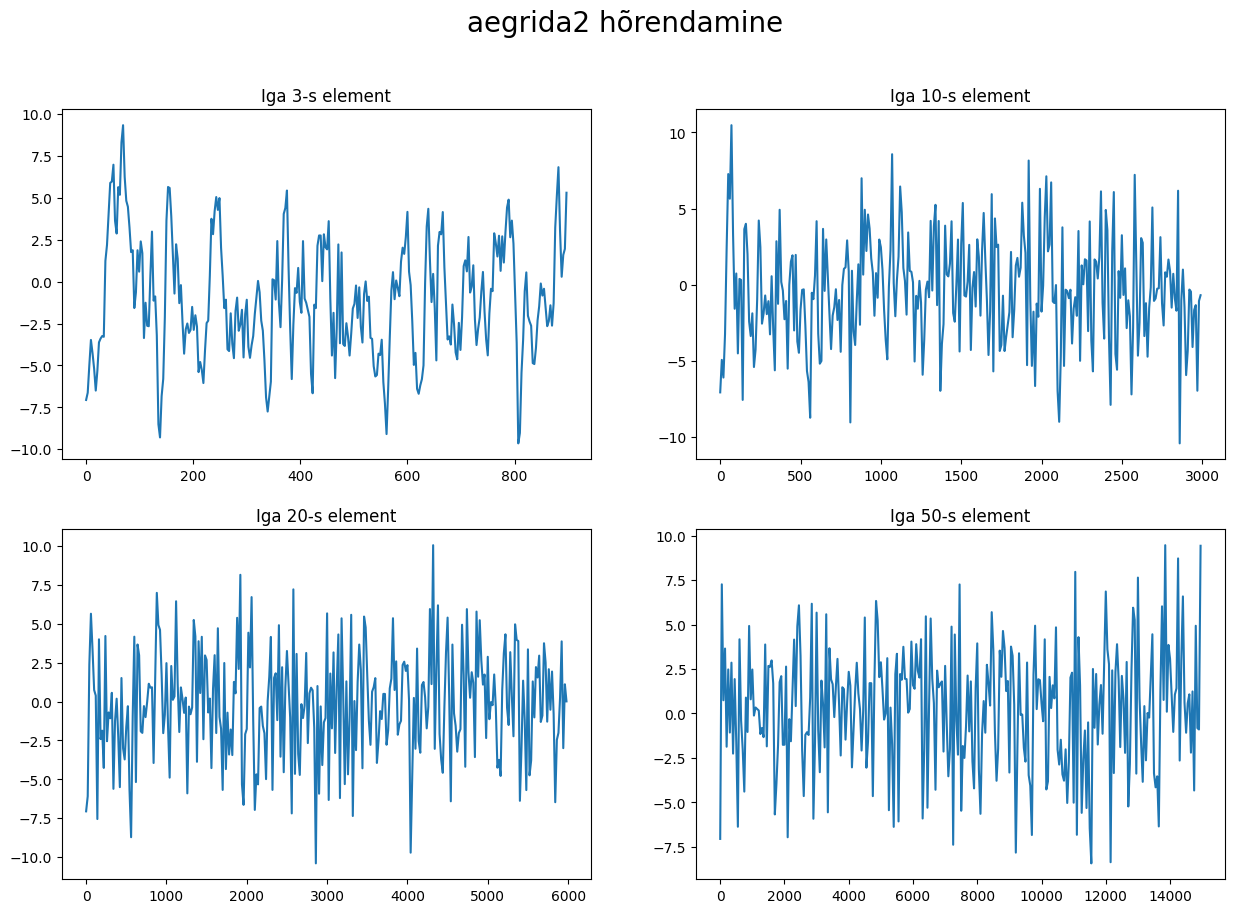

In [24]:
aegrea_hõrendamise_joonis("aegrida2 hõrendamine", d2)

# 4. ülesanne


Teha autokorrelatsiooni kohta joonis, kus x-teljel on nihe (1,2,...) ja y-teljel on autokorrelatsioon. Otsustada selle järgi, kui kaugele ulatub autokorrelatsioon nendes aegridades. Vaadata uuesti eelmise ülesande jooniseid - neid, kus oli hõrendus suurema sammuga kui autokorrelatsiooni ulatus ja võrdluseks neid, kus oli hõrendus palju väiksema sammuga.


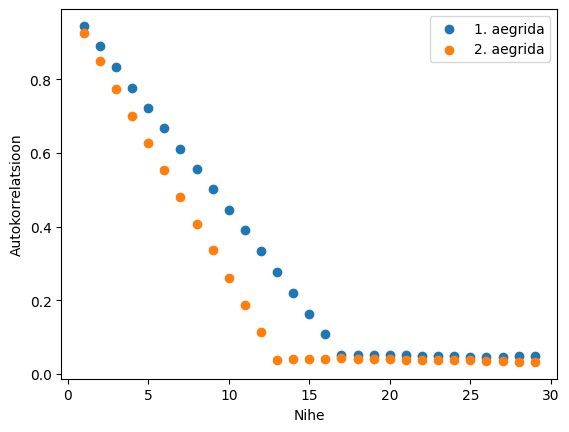

In [26]:
d1_autocorr = [d1.autocorr(i) for i in range(1,30)]
d2_autocorr = [d2.autocorr(i) for i in range(1,30)]

plt.scatter(
    x=range(1,30),
    y=d1_autocorr,
    label="1. aegrida"
)
plt.scatter(
    x=range(1,30),
    y=d2_autocorr,
    label="2. aegrida"
)
plt.xlabel("Nihe")
plt.ylabel("Autokorrelatsioon")

plt.legend()
plt.show()

# 5. ülesanne

Joonistada üles kogu aegrida, et otsida üles koht või kohad kus pikaajaline keskmine muutub. Kas aegridade joonistel on neid kohti märgata? Edasi tehke jooniseid, kus on pikaajalised keskmised, kasutades näiteks `d1.rolling(100).mean()`. Kas nüüd on muutuste kohti märgata? Proovige teha ka veel palju pikaajalisema keskmisega jooniseid.


In [28]:
def pikaajalise_keskmise_joonis(pealkiri, aegrida, aken):
    fig, ax = plt.subplots(2, 1, figsize=(6,8))

    ax[0].plot(aegrida)
    ax[0].set_title(pealkiri)

    ax[1].plot(aegrida.rolling(aken).mean())
    ax[1].set_title(f"Pikaajaline keskmine,  akna pikkus: {aken}")

    plt.show()

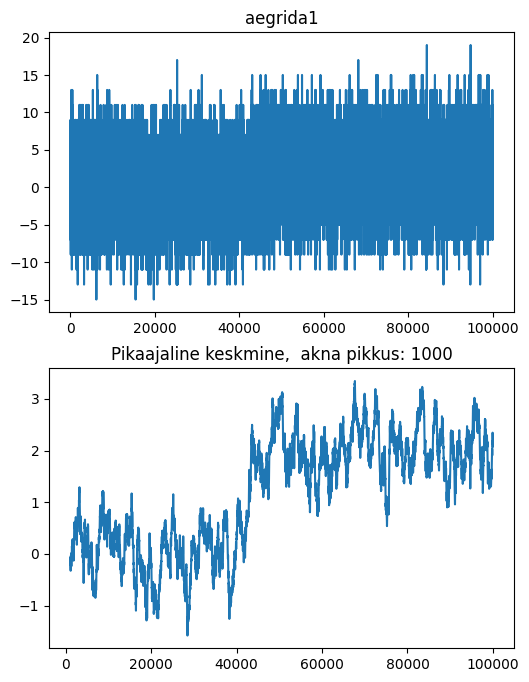

In [37]:
pikaajalise_keskmise_joonis("aegrida1", d1, 1000)


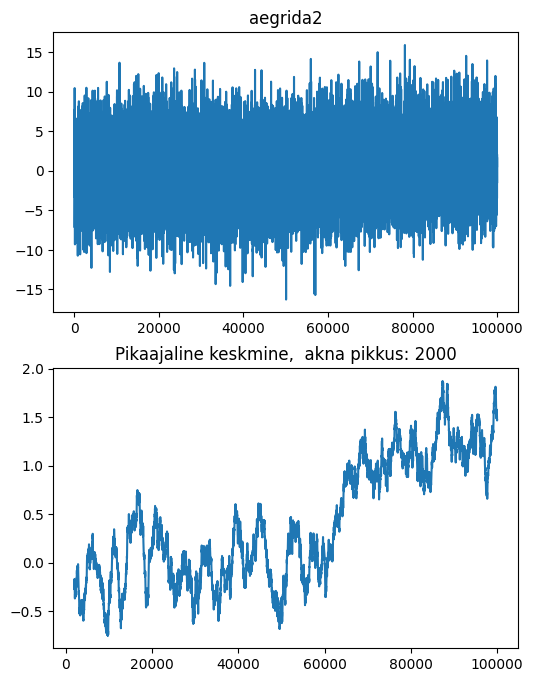

In [39]:
pikaajalise_keskmise_joonis("aegrida2", d2, 2000)

# Kes soovib nuputada:


Arvake ära, kuidas kumbki aegrida on genereeritud
